### features:
* spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet levels

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/AV"

## Load data

Here, our target is to predict disease of patients with multiple diseases. So; our y will be disease column of two column indicatin geach patients disease.

In [3]:
present_df = pd.read_csv(path + "/present/present_AV_p_features.csv", index_col = 0) #1245, 18752
present_df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_165,tempogram_166,tempogram_167,tempogram_168,tempogram_173,tempogram_180,tempogram_181,tempogram_182,tempogram_184,tempogram_191
0,4.053941e-11,5.722774e-11,5.674817e-11,5.604892e-11,5.585778e-11,5.712218e-11,6.096665e-11,6.666104e-11,7.312381e-11,7.987906e-11,...,3.694971e-11,1.134680e-11,2.389866e-12,2.203077e-13,-8.122705e-18,8.131668e-18,2.377722e-17,9.874380e-21,3.277308e-18,1.594158e-17
1,7.029058e-11,1.004992e-10,1.032565e-10,1.067600e-10,1.103392e-10,1.136039e-10,1.163349e-10,1.183813e-10,1.195946e-10,1.198336e-10,...,2.385996e-08,7.722310e-09,1.684974e-09,1.577951e-10,4.220379e-20,2.353653e-17,4.041855e-17,3.897346e-18,2.307725e-17,3.545423e-17
2,6.242156e-11,8.838291e-11,8.841429e-11,8.813666e-11,8.771334e-11,8.792236e-11,8.855698e-11,8.896638e-11,8.933381e-11,8.922699e-11,...,1.597677e-09,5.115552e-10,1.114111e-10,1.047179e-11,-1.754692e-17,1.287416e-17,2.539911e-17,-7.691983e-18,7.988967e-19,1.729207e-17
3,5.658126e-11,8.147643e-11,8.364837e-11,8.546564e-11,8.658269e-11,8.682239e-11,8.612547e-11,8.458010e-11,8.250057e-11,8.019542e-11,...,1.609346e-08,4.978872e-09,1.062980e-09,9.910194e-11,-8.994226e-18,3.161606e-17,3.944629e-17,4.191656e-18,1.564245e-17,2.644279e-17
4,6.675927e-11,9.572394e-11,9.878655e-11,1.025290e-10,1.061944e-10,1.092672e-10,1.114632e-10,1.127096e-10,1.129850e-10,1.121774e-10,...,1.053892e-08,3.516443e-09,7.916528e-10,7.582421e-11,-1.561858e-17,1.496655e-17,2.920759e-17,-7.881559e-18,1.673272e-17,1.686190e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1.421592e-10,2.041520e-10,2.113140e-10,2.194710e-10,2.268139e-10,2.323881e-10,2.358344e-10,2.373206e-10,2.372831e-10,2.360674e-10,...,2.067244e-11,1.848082e-12,4.279497e-14,-6.412760e-18,-1.892472e-17,9.336599e-18,1.355133e-17,-8.971072e-18,1.206258e-18,1.403043e-17
1241,1.923120e-10,2.702142e-10,2.654474e-10,2.609435e-10,2.570200e-10,2.536409e-10,2.515014e-10,2.506988e-10,2.509285e-10,2.519738e-10,...,3.104317e-08,8.636136e-09,1.616377e-09,1.355361e-10,-1.023884e-17,1.872794e-17,3.631436e-17,-1.704163e-18,1.676896e-17,3.088029e-17
1242,2.886341e-10,4.070661e-10,4.033971e-10,3.969121e-10,3.879849e-10,3.776499e-10,3.672374e-10,3.579410e-10,3.507390e-10,3.466603e-10,...,4.953307e-09,1.643199e-09,3.728994e-10,3.603946e-11,-1.049532e-17,1.875301e-17,3.001944e-17,-8.987125e-18,2.075392e-17,2.501257e-17
1243,2.906344e-10,4.077050e-10,3.979113e-10,3.821000e-10,3.611274e-10,3.373070e-10,3.224267e-10,3.126335e-10,3.102847e-10,3.142008e-10,...,3.617801e-10,6.163482e-11,8.988842e-12,8.386634e-13,-1.776589e-18,1.541197e-17,2.293989e-17,7.193964e-18,1.684496e-17,2.212823e-17


In [4]:
absent_df = pd.read_csv(path + "/absent/absent_AV_p_features.csv", index_col = 0) #6890, 18752
absent_df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_165,tempogram_166,tempogram_167,tempogram_168,tempogram_173,tempogram_180,tempogram_181,tempogram_182,tempogram_184,tempogram_191
0,9.032866e-11,1.283307e-10,1.273762e-10,1.246309e-10,1.201637e-10,1.142205e-10,1.071923e-10,9.958826e-11,9.202662e-11,8.600805e-11,...,1.229573e-08,3.539518e-09,6.913353e-10,6.015870e-11,-4.425509e-18,1.527628e-17,3.069961e-17,3.360353e-18,1.392965e-17,2.439336e-17
1,8.539332e-11,1.200104e-10,1.177622e-10,1.140818e-10,1.091471e-10,1.033975e-10,9.780705e-11,9.387825e-11,9.239269e-11,9.306054e-11,...,4.168072e-10,9.191343e-11,1.751558e-11,1.681676e-12,-1.903726e-17,1.009219e-17,2.060304e-17,-8.288342e-18,-2.530324e-18,1.477412e-17
2,6.311897e-11,8.902436e-11,8.830606e-11,8.712377e-11,8.552773e-11,8.359623e-11,8.144592e-11,7.934172e-11,7.727474e-11,7.657807e-11,...,1.407631e-10,4.028191e-11,7.858989e-12,6.858554e-13,-3.553411e-18,9.669628e-18,2.088307e-17,-8.270446e-18,4.801591e-18,2.178446e-17
3,6.343676e-11,9.022266e-11,9.124019e-11,9.224844e-11,9.295056e-11,9.321291e-11,9.301599e-11,9.241415e-11,9.151151e-11,9.047624e-11,...,5.123989e-09,1.636423e-09,3.547727e-10,3.318718e-11,-1.173998e-17,2.113700e-17,3.271036e-17,-5.766655e-18,6.897437e-18,1.759136e-17
4,7.630806e-11,1.079990e-10,1.080264e-10,1.076320e-10,1.065868e-10,1.048177e-10,1.024159e-10,1.003597e-10,1.000656e-10,9.960670e-11,...,1.488253e-09,5.085275e-10,1.179416e-10,1.154484e-11,-2.253705e-17,1.134327e-17,3.033557e-17,-1.462569e-18,1.988642e-17,2.560940e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,4.391115e-11,6.325533e-11,6.596380e-11,6.906291e-11,7.179823e-11,7.381084e-11,7.502210e-11,7.552006e-11,7.542620e-11,7.479751e-11,...,1.610333e-08,5.381846e-09,1.215283e-09,1.165740e-10,-1.364235e-17,1.561749e-17,2.741938e-17,-6.581439e-18,1.704671e-17,2.236864e-17
6976,6.021307e-11,8.525027e-11,8.540722e-11,8.544461e-11,8.529221e-11,8.496842e-11,8.454631e-11,8.414250e-11,8.394189e-11,8.404234e-11,...,6.409633e-09,1.985497e-09,4.324786e-10,4.108762e-11,-1.367223e-17,5.665199e-18,2.509268e-17,-8.479062e-18,5.454273e-18,1.684958e-17
6977,4.200291e-11,5.951789e-11,5.957082e-11,5.933758e-11,5.883054e-11,5.856920e-11,5.882910e-11,5.902975e-11,5.904306e-11,5.891823e-11,...,1.495706e-08,4.869521e-09,1.077951e-09,1.023359e-10,-1.660658e-17,3.492718e-17,3.607055e-17,-7.115761e-18,2.491467e-17,3.799787e-17
6978,3.381760e-11,4.864368e-11,4.980425e-11,5.108621e-11,5.242817e-11,5.394787e-11,5.591244e-11,5.805302e-11,6.023821e-11,6.247719e-11,...,1.562378e-09,5.046506e-10,1.114649e-10,1.058987e-11,-1.277173e-17,1.912307e-17,3.395590e-17,-9.225937e-18,1.692093e-17,3.087130e-17


### create labels

In [5]:
y = np.concatenate((np.ones(1245), np.zeros(6980)), axis =0)
y.shape

(8225,)

## concat features

In [6]:
df = pd.concat([present_df, absent_df], axis = 0) #8225, 18753
df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_165,tempogram_166,tempogram_167,tempogram_168,tempogram_173,tempogram_180,tempogram_181,tempogram_182,tempogram_184,tempogram_191
0,4.053941e-11,5.722774e-11,5.674817e-11,5.604892e-11,5.585778e-11,5.712218e-11,6.096665e-11,6.666104e-11,7.312381e-11,7.987906e-11,...,3.694971e-11,1.134680e-11,2.389866e-12,2.203077e-13,-8.122705e-18,8.131668e-18,2.377722e-17,9.874380e-21,3.277308e-18,1.594158e-17
1,7.029058e-11,1.004992e-10,1.032565e-10,1.067600e-10,1.103392e-10,1.136039e-10,1.163349e-10,1.183813e-10,1.195946e-10,1.198336e-10,...,2.385996e-08,7.722310e-09,1.684974e-09,1.577951e-10,4.220379e-20,2.353653e-17,4.041855e-17,3.897346e-18,2.307725e-17,3.545423e-17
2,6.242156e-11,8.838291e-11,8.841429e-11,8.813666e-11,8.771334e-11,8.792236e-11,8.855698e-11,8.896638e-11,8.933381e-11,8.922699e-11,...,1.597677e-09,5.115552e-10,1.114111e-10,1.047179e-11,-1.754692e-17,1.287416e-17,2.539911e-17,-7.691983e-18,7.988967e-19,1.729207e-17
3,5.658126e-11,8.147643e-11,8.364837e-11,8.546564e-11,8.658269e-11,8.682239e-11,8.612547e-11,8.458010e-11,8.250057e-11,8.019542e-11,...,1.609346e-08,4.978872e-09,1.062980e-09,9.910194e-11,-8.994226e-18,3.161606e-17,3.944629e-17,4.191656e-18,1.564245e-17,2.644279e-17
4,6.675927e-11,9.572394e-11,9.878655e-11,1.025290e-10,1.061944e-10,1.092672e-10,1.114632e-10,1.127096e-10,1.129850e-10,1.121774e-10,...,1.053892e-08,3.516443e-09,7.916528e-10,7.582421e-11,-1.561858e-17,1.496655e-17,2.920759e-17,-7.881559e-18,1.673272e-17,1.686190e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,4.391115e-11,6.325533e-11,6.596380e-11,6.906291e-11,7.179823e-11,7.381084e-11,7.502210e-11,7.552006e-11,7.542620e-11,7.479751e-11,...,1.610333e-08,5.381846e-09,1.215283e-09,1.165740e-10,-1.364235e-17,1.561749e-17,2.741938e-17,-6.581439e-18,1.704671e-17,2.236864e-17
6976,6.021307e-11,8.525027e-11,8.540722e-11,8.544461e-11,8.529221e-11,8.496842e-11,8.454631e-11,8.414250e-11,8.394189e-11,8.404234e-11,...,6.409633e-09,1.985497e-09,4.324786e-10,4.108762e-11,-1.367223e-17,5.665199e-18,2.509268e-17,-8.479062e-18,5.454273e-18,1.684958e-17
6977,4.200291e-11,5.951789e-11,5.957082e-11,5.933758e-11,5.883054e-11,5.856920e-11,5.882910e-11,5.902975e-11,5.904306e-11,5.891823e-11,...,1.495706e-08,4.869521e-09,1.077951e-09,1.023359e-10,-1.660658e-17,3.492718e-17,3.607055e-17,-7.115761e-18,2.491467e-17,3.799787e-17
6978,3.381760e-11,4.864368e-11,4.980425e-11,5.108621e-11,5.242817e-11,5.394787e-11,5.591244e-11,5.805302e-11,6.023821e-11,6.247719e-11,...,1.562378e-09,5.046506e-10,1.114649e-10,1.058987e-11,-1.277173e-17,1.912307e-17,3.395590e-17,-9.225937e-18,1.692093e-17,3.087130e-17


## With threshold

In [7]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.0001)   # düşük  threshold
_ = vt.fit(df)
masked = vt.get_support()
features_masked = df.loc[:, masked]
features_masked # uncomment to see the dataframe

,freq_15548,freq_15549,freq_15550,freq_15551,freq_15552,freq_15553,freq_15554,freq_15555,freq_15556,freq_15557,...,tempogram_32,tempogram_33,tempogram_34,tempogram_35,tempogram_36,tempogram_37,tempogram_38,tempogram_39,tempogram_40,tempogram_63
0,0.001109,0.001045,0.001132,0.001241,0.001341,0.001425,0.001487,0.001527,0.001545,0.001542,...,0.139685,0.161723,0.177954,0.175266,0.156202,0.136741,0.133968,0.140228,0.138467,0.005654
1,0.000781,0.000851,0.000916,0.000977,0.001028,0.001066,0.001096,0.001121,0.001143,0.001162,...,0.435264,0.395017,0.348703,0.319353,0.325319,0.337245,0.322590,0.283827,0.243349,0.117819
2,0.000977,0.000989,0.000992,0.000984,0.000965,0.000934,0.000894,0.000850,0.000812,0.000783,...,0.357649,0.303356,0.290824,0.298351,0.292947,0.257196,0.201496,0.175772,0.187462,0.031981
3,0.000792,0.000761,0.000722,0.000676,0.000627,0.000594,0.000588,0.000592,0.000601,0.000624,...,0.429237,0.401814,0.377618,0.388225,0.404285,0.386380,0.367979,0.371317,0.380699,0.184630
4,0.001236,0.001252,0.001261,0.001268,0.001274,0.001275,0.001268,0.001255,0.001238,0.001221,...,0.311087,0.271959,0.224440,0.218496,0.245484,0.239319,0.224054,0.221855,0.232380,0.060882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,0.001089,0.001066,0.001046,0.001032,0.001025,0.001028,0.001036,0.001047,0.001058,0.001068,...,0.344799,0.323951,0.352206,0.378306,0.349271,0.267709,0.238679,0.283036,0.321522,0.128929
6976,0.000462,0.000454,0.000447,0.000443,0.000443,0.000447,0.000455,0.000466,0.000481,0.000507,...,0.234272,0.295859,0.342401,0.347677,0.299368,0.258877,0.243359,0.207138,0.161099,0.072430
6977,0.000332,0.000326,0.000325,0.000324,0.000324,0.000326,0.000330,0.000335,0.000340,0.000343,...,0.446674,0.488392,0.456314,0.386232,0.354241,0.379434,0.389279,0.370740,0.323443,0.127652
6978,0.000382,0.000376,0.000369,0.000360,0.000348,0.000335,0.000322,0.000307,0.000293,0.000277,...,0.347816,0.359125,0.377013,0.358137,0.326472,0.324497,0.359295,0.354331,0.293174,0.072435


In [8]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y , train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [9]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective= "binary:logistic", eval_metric = "logloss")


In [10]:
clf.fit(X_train_, y_train_)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [13]:
yhat = clf.predict(X_valid_)

In [14]:
yhat.shape

(1645,)

In [15]:
y_valid_.shape

(1645,)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

accuracy: 85.78%


In [17]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 85.78%


In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 84.73%


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


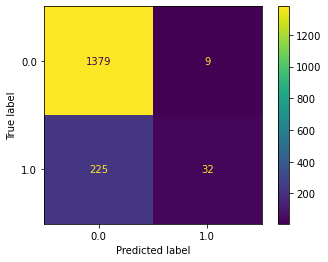

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_valid_, y_valid_) 

In [20]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_valid_, yhat)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.5590


In [ ]:
from sklearn.manifold import TSNE
fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(standard_spec)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_num  )
plt.show()